In [1]:
import pandas as pd
import cupy as cp
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.rcParams['agg.path.chunksize'] = 10000

In [2]:
import cupy as cp

class LinearRegression:
    def __init__(self, lr=0.001, n_itters=10000, use_gradient_descent=False) -> None:
        self.lr = lr
        self.n_itters = n_itters
        self.use_gradient_descent = use_gradient_descent
        self.weights = None
        self.bias = None

    def fit(self, X: cp.array, y: cp.array):
        n_samples, n_features = X.shape
        self.weights = cp.zeros(n_features)
        self.bias = 0

        if self.use_gradient_descent:
            for _ in range(self.n_itters):
                y_predicted = cp.dot(X, self.weights) + self.bias
                dw = (1 / n_samples) * cp.dot(X.T, (y_predicted - y))
                db = (1 / n_samples) * cp.sum(y_predicted - y)

                self.weights -= self.lr * dw
                self.bias -= self.lr * db
        else:
            # Closed-form solution
            self.weights = cp.linalg.inv(X.T @ X) @ (X.T @ y)

    def predict(self, X):
        y_predict = cp.dot(X, self.weights) + self.bias
        return y_predict

    def mean_squared_error(self, y_true, y_pred):
        return cp.mean((y_true - y_pred) ** 2)


In [20]:
X, y = datasets.make_regression(n_samples=200, n_features=2, noise=0.2, random_state=12)

In [21]:
X = cp.array(X) 
y = cp.array(y)

In [22]:
X

array([[ 1.41362414, -0.63257081],
       [ 0.16498885, -1.6112949 ],
       [ 0.41043079, -0.07749633],
       [-0.12214979,  1.34235637],
       [ 1.37052988,  0.1682981 ],
       [ 0.41070962, -1.79682746],
       [ 0.52733267,  0.64076111],
       [-0.10586232, -0.57188106],
       [ 0.24920321, -0.76353049],
       [-2.03586204,  0.59590861],
       [ 0.06377873, -1.83910931],
       [-1.08851741, -0.12549567],
       [-0.3498344 ,  0.20223092],
       [-0.56514289, -0.25080271],
       [ 0.35622301, -0.4663511 ],
       [-1.00100155,  1.82882072],
       [-1.30015145,  0.73767148],
       [ 0.51202216, -0.10526799],
       [-1.16358834, -1.4212769 ],
       [-0.83440503,  0.79079299],
       [ 0.84274139, -0.7326291 ],
       [-0.67794537,  0.03541635],
       [-1.68965292, -1.33938922],
       [ 0.42158037, -0.20630936],
       [ 0.73414765, -0.29182345],
       [-0.66635559, -0.04385179],
       [-0.71385629, -0.99720384],
       [-0.90490873,  0.66298401],
       [-0.60329911,

In [23]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.32,random_state=154)
X_train = cp.array(X_train)
X_test = cp.array(X_test)
y_train = cp.array(y_train)
y_test = cp.array(y_test)

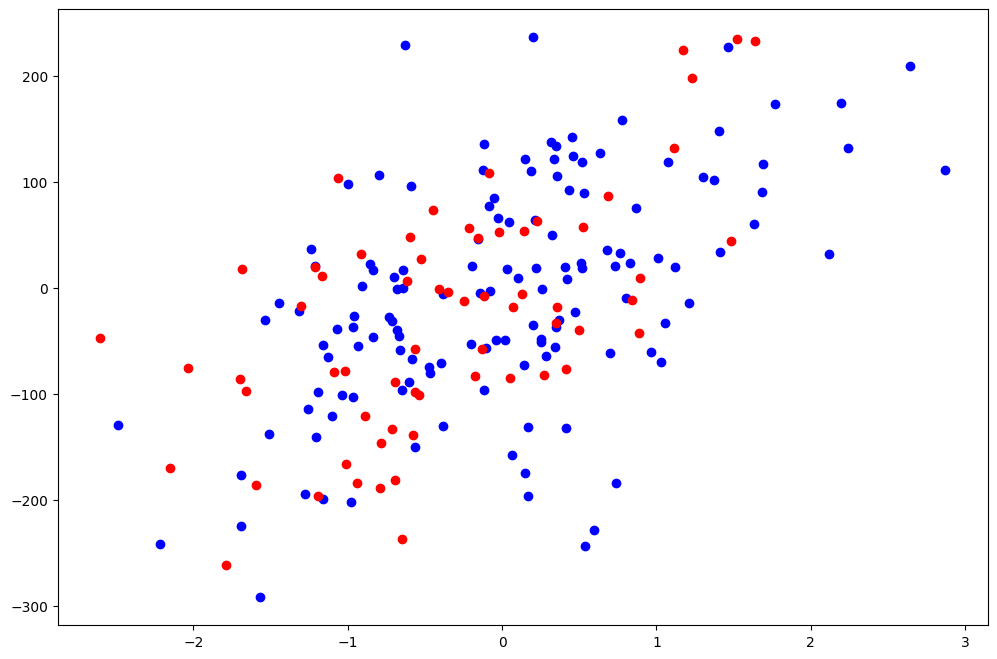

In [25]:
# 3d plot
plt.figure(figsize=(12,8))
plt.scatter(X_train[:,0].get(),y_train.get(),c='blue',label='Train')
plt.scatter(X_test[:,0].get(),y_test.get(),c='red',label='Test')
plt.show()

In [26]:
print(X_train.shape)
print(y_train.shape)

(136, 2)
(136,)


In [36]:
# Assuming X_train and y_train are your training data
model = LinearRegression(lr=0.01, n_itters=1000, use_gradient_descent=False)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = model.mean_squared_error(y_test, predictions)

print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.04903069802367753


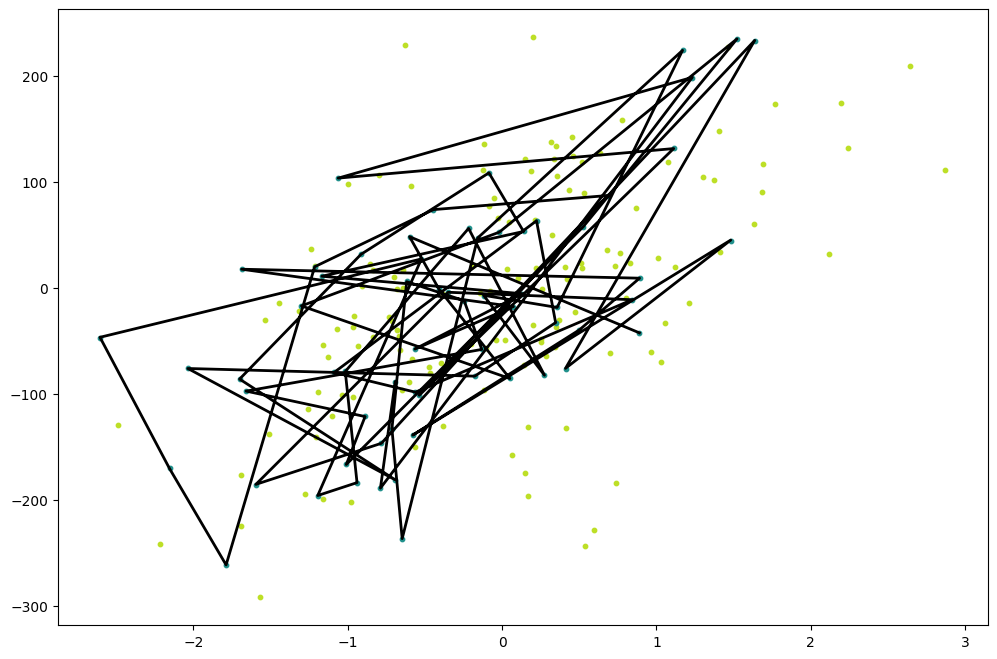

In [37]:
y_predicted_line = predictions
cmap = plt.get_cmap('viridis')
plt.figure(figsize=(12,8))
plt.scatter(X_train[:,0].get(),y_train.get(),color=cmap(0.9),s=10)
plt.scatter(X_test[:,0].get(),y_test.get(),color=cmap(0.5),s=10)
plt.plot(X_test[:,0].get(),y_predicted_line.get(),color='black',linewidth=2,label='Prediction')
plt.show()

Predictions: [ -88.9746745  -189.11733701  198.51274019  103.42289433  131.31405557
 -101.51290679  233.40422644  -76.0920503    44.97045543 -139.12024301
  -39.79311517    8.99839638   17.45620019  -17.77485684  -57.89684872
   -5.68417313   10.83330769   53.08191975  108.39750539   31.53952483
  -86.21931882 -181.2340108   -76.22729757  -83.45403822  -32.92749515
   63.17190643  -79.95459813  -98.57048454  -11.33700295   -4.28721053
 -185.58970592 -146.82429437   86.96883599   73.7028196    19.79786825
 -261.58009899 -170.75693589  -46.78699503   27.15078306 -196.114685
 -183.92611323  -79.06159334   55.97427781  -82.59741626   -7.15512221
  -18.62025777  224.00635143   46.96529727 -236.77935343 -133.18568836
    5.66622466  -12.25503949  -58.24142105  -97.56796183 -121.5842978
 -166.81812967   57.53002058  234.84313758   52.40649891  -17.16148705
  -85.68582602   -1.21913081   48.14973599  -42.597588  ]
Shapes -> X_train: (136, 2), y_train: (136,), X_test: (64, 2), y_test: (64,), pr

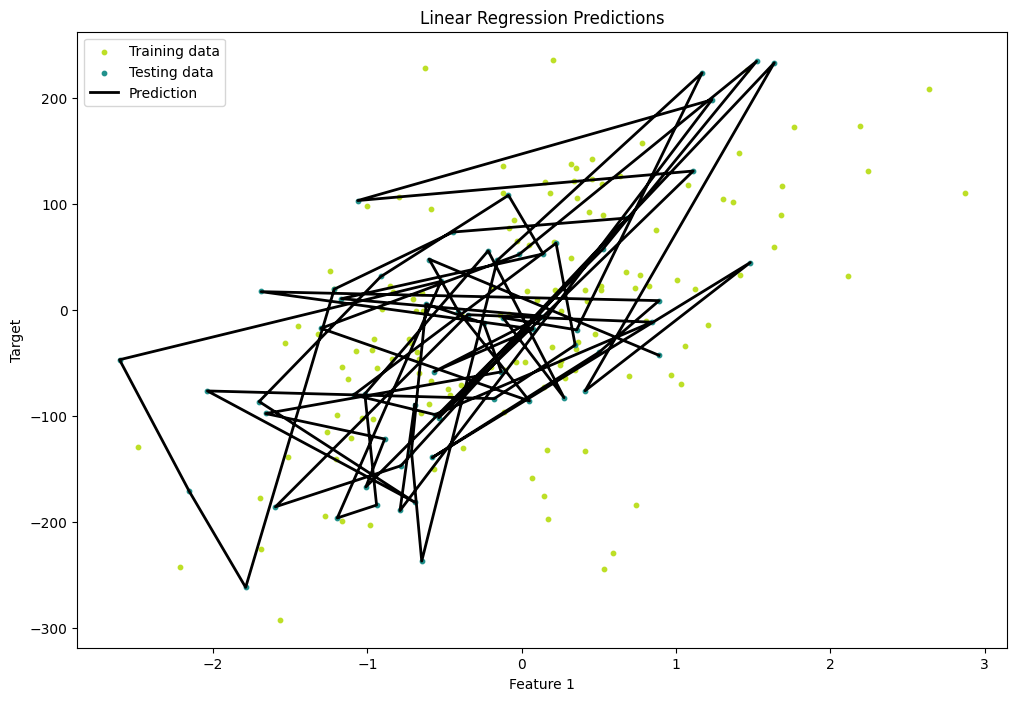

In [38]:
import matplotlib.pyplot as plt

# Ensure your predictions are correct and have the right shape
predictions = model.predict(X_test)
print(f"Predictions: {predictions}")  # Print predictions for debugging

# Check the shapes
print(f"Shapes -> X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}, predictions: {predictions.shape}")

# Ensure that your prediction is the same length as y_test
if predictions.shape[0] != y_test.shape[0]:
    raise ValueError("The length of predictions does not match the length of y_test.")

# Visualization
y_predicted_line = predictions  # This should be your predicted line
cmap = plt.get_cmap('viridis')
plt.figure(figsize=(12, 8))

# Scatter plots for training and testing data
plt.scatter(X_train[:, 0].get(), y_train.get(), color=cmap(0.9), s=10, label='Training data')
plt.scatter(X_test[:, 0].get(), y_test.get(), color=cmap(0.5), s=10, label='Testing data')

# Plotting the predictions
plt.plot(X_test[:, 0].get(), y_predicted_line.get(), color='black', linewidth=2, label='Prediction')

# Adding labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('Linear Regression Predictions')
plt.legend()
plt.show()


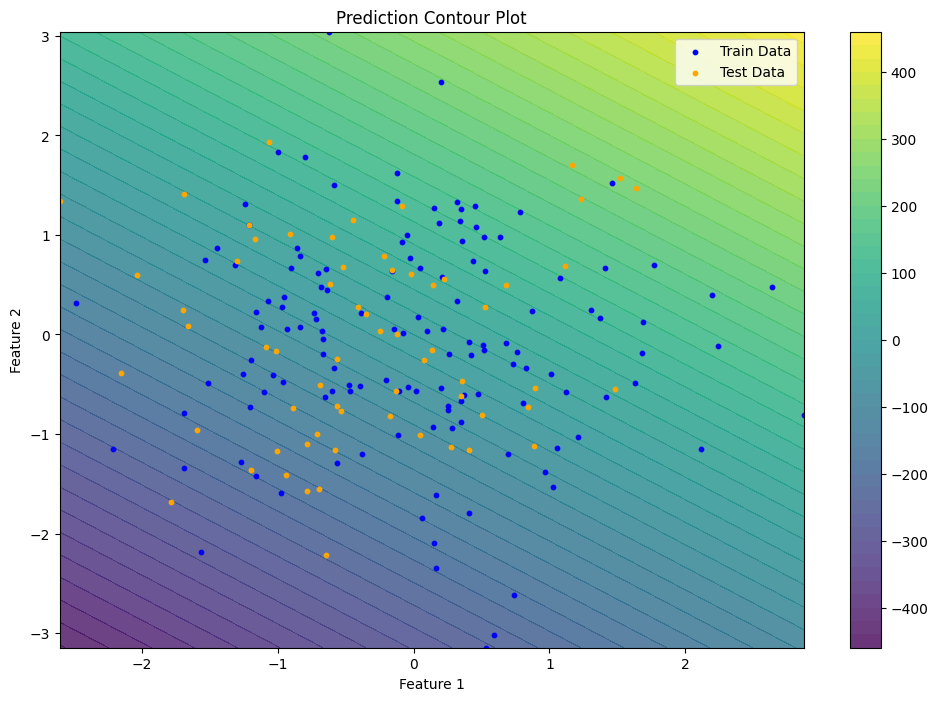

In [39]:
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt

# Create a grid of values for the two features
x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# Stack the grids to pass them to the model for predictions
grid = cp.vstack([cp.array(x1_grid.flatten()), cp.array(x2_grid.flatten())]).T

# Get predictions for the grid
predicted_grid = model.predict(grid)

# Reshape the predictions to match the grid shape
predicted_grid = predicted_grid.get().reshape(x1_grid.shape)

# Create the contour plot
plt.figure(figsize=(12, 8))
contour = plt.contourf(x1_grid.get(), x2_grid.get(), predicted_grid, levels=50, cmap='viridis', alpha=0.8)
plt.colorbar(contour)
plt.scatter(X_train[:, 0].get(), X_train[:, 1].get(), color='blue', s=10, label='Train Data')
plt.scatter(X_test[:, 0].get(), X_test[:, 1].get(), color='orange', s=10, label='Test Data')
plt.title('Prediction Contour Plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


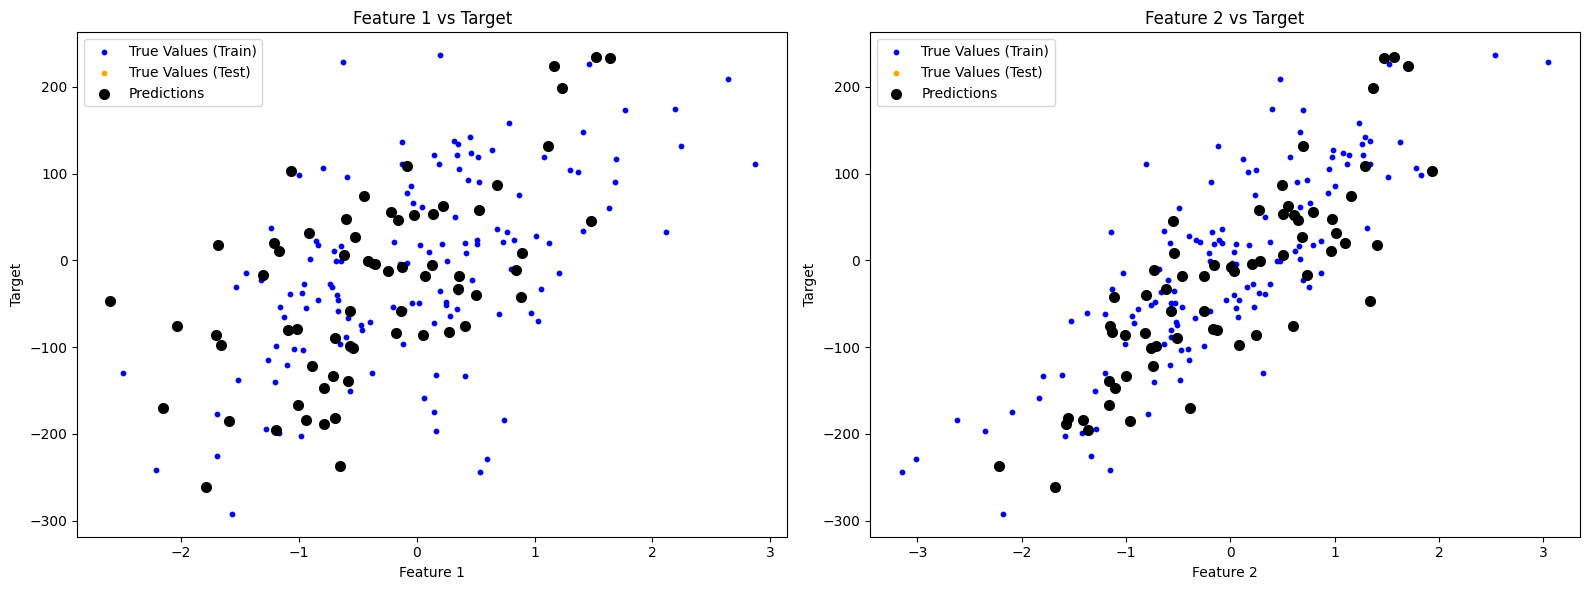

In [40]:
import cupy as cp
import matplotlib.pyplot as plt

# Assume predictions and data are already defined
y_predicted_line = predictions

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot for feature 1 (X_train[:, 0]) vs. y
ax[0].scatter(X_train[:, 0].get(), y_train.get(), color='blue', s=10, label='True Values (Train)')
ax[0].scatter(X_test[:, 0].get(), y_test.get(), color='orange', s=10, label='True Values (Test)')
ax[0].scatter(X_test[:, 0].get(), y_predicted_line.get(), color='black', linewidth=2, label='Predictions')
ax[0].set_title('Feature 1 vs Target')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Target')
ax[0].legend()

# Plot for feature 2 (X_train[:, 1]) vs. y
ax[1].scatter(X_train[:, 1].get(), y_train.get(), color='blue', s=10, label='True Values (Train)')
ax[1].scatter(X_test[:, 1].get(), y_test.get(), color='orange', s=10, label='True Values (Test)')
ax[1].scatter(X_test[:, 1].get(), y_predicted_line.get(), color='black', linewidth=2, label='Predictions')
ax[1].set_title('Feature 2 vs Target')
ax[1].set_xlabel('Feature 2')
ax[1].set_ylabel('Target')
ax[1].legend()

plt.tight_layout()
plt.show()


In [41]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicting the values for the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse_train = mean_squared_error(y_train.get(), y_train_pred.get())
mse_test = mean_squared_error(y_test.get(), y_test_pred.get())

# Calculate R² Score
r2_train = r2_score(y_train.get(), y_train_pred.get())
r2_test = r2_score(y_test.get(), y_test_pred.get())

print(f"Training Mean Squared Error: {mse_train:.4f}")
print(f"Test Mean Squared Error: {mse_test:.4f}")
print(f"Training R² Score: {r2_train:.4f}")
print(f"Test R² Score: {r2_test:.4f}")


Training Mean Squared Error: 0.0385
Test Mean Squared Error: 0.0490
Training R² Score: 1.0000
Test R² Score: 1.0000
